# 분류하는 뉴런을 만듭니다 - 이진분류

## 04-1 초기 인공지능 알고리즘과 로지스틱 회귀를 알아봅시다.

### 퍼셉트론에 대해 알아봅니다.

1957년 코넬 항공 연구소의 프랑크 로젠블라트는 이진 분류 문제에서 최적의 가중치를 학습하는 퍼셉트론(perceptron) 알고리즘을 발표하였습니다. <br>
이진분류(binary classification)란 임의의 샘플 데이터를 True나 False로 구분하는 문제를 말합니다.<br>

퍼셉트론의 구조는 2개의 변수 

$ w_1x_1 + w_2x_2 + b = z$ 로 z 를 구한뒤 계단 함수(step function)을 사용하여 통과한 값을 통해 다시 가중치와 절편을 업데이트(학습)하는데 사용합니다.
<br><br>
계단함수는 z가 0보다 크거나 같으면 1로 작으면 -1로 나타내는 함수 입니다.
<br><br>

사실 챕터 2에서는 문제를 단순화 하기 위해 변수 x를 하나만 사용했지만 다양한 특성 x가 나타날 수 있습니다. 따라서

$z = b + sum_{i=0}^nw_ix_i $ 의 형태로 선형 함수를 나타낼 수 있습니다.



### 아달린에 대해 알아봅시다.

퍼셉트론이 등장한 이후 1960년대에 스탠포드 대학의 버나드 위드로우와 테드호프가 퍼셉트론을 개선한 적응형 선형 뉴런(아달린)을 발표하였습니다. 아달린은 선형함수의 결과를 학습에 적용합니다 계단함수의 결과는 예측에만 활용하죠.
<br>

---

### 로지스틱 회귀에 대해 알아봅시다.

**로지스틱 회귀(logistic regression)**는 아달린에서 조금 더 발전한 형태를 취하고 있습니다. 로지스틱 회귀는 선형 함수를 통과 시켜 얻은 z를 임계함수에 보내기 전에 변형시키는데 바로 이런 함수를 **활성화 함수(activation functino)**라고 부릅니다. 로지스틱 회귀는 마지막 단계에서 **임계 함수(threshold function)**를 사용하여 예측을 수행합니다.

#### 활성화 함수는 비선형 함수를 사용합니다.

* 선형함수만 사용하면 결국 선형함수를 사용한 것과 같기 때문입니다.

다음은 비 선형 함수의 한 예입니다. <br><br>


### $$ p=\frac{1}{1+e^{-z}}$$
<br>

## 04-2 시그모이드 함수로 확률을 만듭니다.
<br>
활성화 함수인 시그모이드 함수는 z를 0~1 사이의 확률값으로 변환 시켜주는 역할을 합니다. 해석하기 나름이지만 보통 0.5 이상을 양성 클래스 그 이하면 음성 클래스로 구분합니다.

### 시그모이드 함수가 만들어지는 과정을 살펴봅시다.<br>

오즈비 > 로짓함수 > 시그모이드

오즈 비(odds ratio)는 성공 확률과 실패 확률을 나타내는 통계이며 다음과 같이 정의 됩니다.
<br><br>


$$ OR(odds ratio) = \frac{p}{1-p} ) (p는 성공확률) $$ <br>



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.arange(start=0,stop=0.99,step=0.01)
y = x / (1-x)

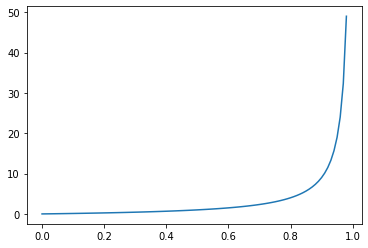

In [7]:
plt.plot(x,y)
plt.show()

### 로짓 함수에 대해 알아볼까요?

오즈 비에 로그 함수를 취하여 만든 함수를 로짓 함수(logit function)라고 합니다. 
<br>로짓 함수의 식은 다음과 같습니다.<br>

$$ logit(p) = log(\frac{p}{1-p}) $$ <br>


C:\Users\pulli\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


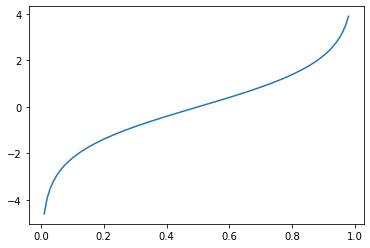

In [8]:
y2 = np.log(y)
plt.plot(x,y2)
plt.show()

### 로지스틱 함수에 대해 알아볼까요?

위 식을 다시 z에 대하여 정리하면 다음의 식이 됩니다. z에 대해 정리하는 이유는 가로축을 z로 놓기 위해서입니다.<br><br>

### $$p = \frac{1}{1+e^{-z}}$$ <br>

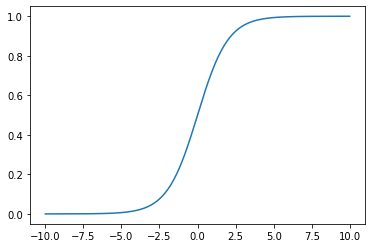

In [9]:
z = np.arange(start=-10, stop=10, step = 0.01)
y3 = 1/(1+np.exp(-z))
plt.plot(z,y3)
plt.show()

## 04-3 로지스틱 손실 함수를 경사 하강법에 적용합니다.

### 로지스틱 손실 함수를 제대로 알아봅시다.

로지스틱 손실 함수는 다중 분류를 위한 손실 함수인 크로스 엔트로피(cross entropy)손실 함수를 이진 분류 버전으로 만든것입니다.

### $$L = -(ylog{(a)} + (1-y)log{(1-a)}$$<br>

이제 로지스틱 손실 함수의 최솟값을 만드는 가중치와 절편을 찾기 위해 미분만 하면 됩니다.

### 로지스틱 손실함수 미분하기 
<br>
로지스틱 손실 함수를 미분해 보겠습니다.
<br><br>


$$\frac{\partial}{\partial w_1}L = -(y-a)x_i$$ <br>
$$\frac{\partial}{\partial b}L = -(y-a)$$ <br>

그런데 미분한 결과를 자세히 보면 $\hat{y}$만 a로 바뀌었을 제곱 오차를 미분한 결과와 동일합니다. 따라서 로지스틱 회귀의 구현이 Neuron클래스와 크게 다르지 않을 것이라는 생각이 들 것입니다.
<br>

---

미분 상세 과정생략

### 가중치 업데이트 방법 정리

$$w_i = w_i - \frac{\partial L}{\partial w_i} = w_i + (y-a)x_i$$

### 절편 업데이트 방법 정리

$$b = b - \frac{\partial L}{\partial b} = b + (y-a)$$

## 04-4 분류용 데이터 세트를 준비합니다.

사이킷런에 포함된 위신콘신 유방암 데이터 세트를 사용합니다.



In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [0]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [0]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

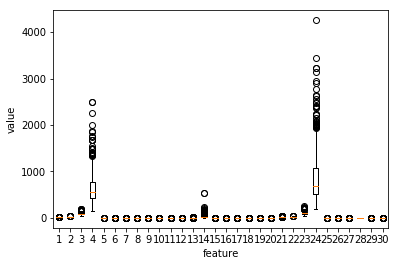

In [0]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [0]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [0]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [0]:
x = cancer.data
y = cancer.target

## 04-5 로지스틱 회귀를 위한 뉴런을 만듭니다.

### 모델의 성능 평가를 위한 훈련 세트와 테스트 세트

훈련된 모델의 실전 성능을 일반화 성능(generalization performance)이라고 부릅니다. 그런데 모델에 학습시킨 훈련 데이터 세트로 다시 모델의 성능을 평가하면 그 모델은 당연히 좋은 성능이 나올 것입니다. 이런 성능 평가를 '과도하게 낙관적으로 일반화 성능을 추정합니다.' 따라서 데이터를 두 덩어리로 나누어 하나는 훈련에 다른 하나는 테스트에 사용합니다. 당연히 훈련데이터가 더 많아야 하며 나누기 전에 양성 음성 클래스가 어느 한쪽에 몰리지 않도록 골고루 섞어야 합니다.


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
#stratify 훈련데이터를 나눌 때 클래스 비율을 동일하게 만듭니다.
#test_size = 0.2 테스트에 전체의 20%를 할당하겠다.
#random 의 seed 같은 것 결과를 동일하게 하기 위해서 값 42로 고정


In [0]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [0]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [0]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    return np.sum(x*self.w) + self.b
  
  def backprop(self, x, err):
    return x*err, err

  def activation(self, z):
    return (1 / (1 + np.exp(-z)))

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5
    

In [0]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


In [0]:
neuron.w

array([ 4.48212100e+03,  2.50380000e+02,  2.25326800e+04,  3.77790000e+03,
        1.35087800e+01, -1.32472480e+02, -2.30506664e+02, -8.84863530e+01,
        5.36320000e+00,  1.79346700e+01,  3.71583000e+01,  1.54449000e+02,
       -3.82190300e+02, -8.17391500e+03, -9.08397000e-01, -3.95507940e+01,
       -5.58356153e+01, -1.06943310e+01, -7.54708300e+00, -2.11901930e+00,
        4.60024100e+03, -3.49980000e+02,  1.87290500e+04, -8.51160000e+03,
       -1.21236000e+00, -4.92532850e+02, -6.38802909e+02, -1.67616223e+02,
       -7.94328000e+01, -1.58601600e+01])

In [0]:
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


0.8245614035087719

In [0]:
np.mean(neuron.predict(x_train) == y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


0.865934065934066

## 04-6 로지스틱 회귀 뉴런으로 단일층 신경망을 만듭니다.
<br>
사실 우리는 이미 단일층 신경망을 구현했습니다.!<br> 로지스틱 회귀는 단일층 신경망(single layer neural network)과 동일하기 때문입니다.
<br>

### 일반적인 신경망의 모습을 알아봅시다.
<br>
일반적으로 신경망은 입력층, 출력층, 가운데 은닉층으로 구성되어 있습니다.
단일층신경망은 은닉층이 없는 신경망이라고 할 수 있습니다.



## 단일층 신경망을 구현합니다.

지금까지 사용한 경사 하강법은 샘플 데이터 1개에 대한 그레이디언트를 계산하였습니다. 이를 확률적 경사 하강법(stochastic gradient descent)라고 부릅니다. 전체 훈련 세트를 사용하여 한 번에 그레디언트를 계산하는 방식인 배치 경사 하강법(batch gradient descent)과 배치 크기를 작게 하여 처리하는 방식인 미니 배치 경사 하강법이 있습니다.

In [0]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    return np.sum(x*self.w) + self.b
  
  def backprop(self, x, err):
    return x*err, err

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0],1)), x]
  def activation(self, z):
    return (1 / (1 + np.exp(-z)))

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10,1-1e-10) #안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.

        loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0
  
  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [0]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


0.8947368421052632

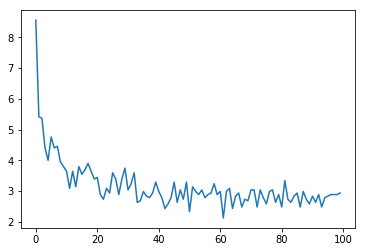

In [0]:
plt.plot(layer.losses)
plt.show()

In [0]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [0]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [0]:
y_test[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [0]:
np.mean(sgd.predict(x_test[:10]) == y_test[:10])

0.8